<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/5%20-%20Reti%20Neurali/neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reti Neurali - il Multilayer Perceptron

### Importiamo i moduli

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#recupera funzioni da repository ProfessionAI
!wget https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/script/viz.py

--2025-10-16 13:34:36--  https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/script/viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1088 (1.1K) [text/plain]
Saving to: ‘viz.py’

viz.py              100%[===================>]   1.06K  --.-KB/s    in 0s      

2025-10-16 13:34:36 (43.7 MB/s) - ‘viz.py’ saved [1088/1088]



In [3]:
from viz import plot_decision_boundary

### Definiamo le costanti

In [4]:
RANDOM_SEED = 0

### Generiamo i dati

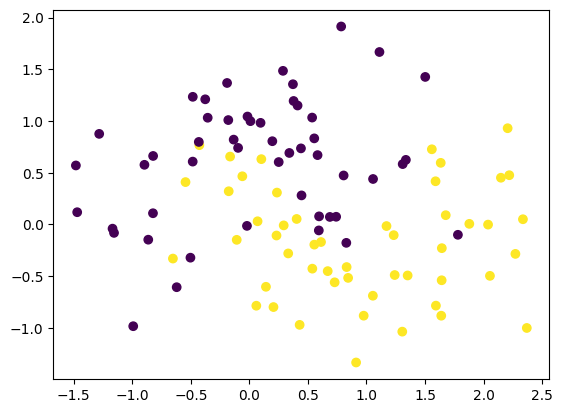

In [9]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.45, random_state=RANDOM_SEED)
plt.scatter(X[:,0], X[:,1], c=y)

### Processiamo i dati

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [11]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

### Regressione Logistica

proviamo a fare un modello con la regressione logistica, giusto per provare

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) #valuta il modello con l'accuracy

0.85

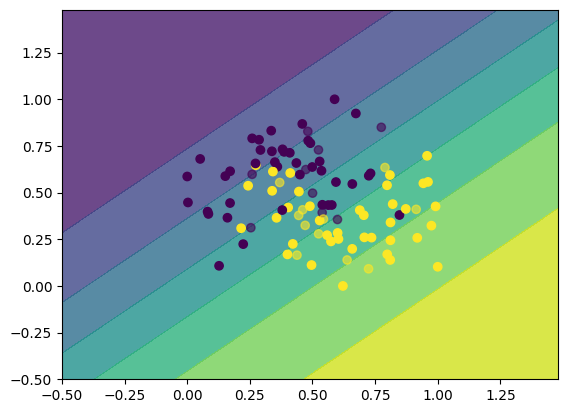

In [22]:
plot_decision_boundary(lr, (X_train, y_train), (X_test, y_test))

### Multilayer Perceptron (MLP)

In [14]:
from sklearn.neural_network import MLPClassifier

In [29]:
#rete con 3 strati nascosti da 100 nodi ciascuna
mlp = MLPClassifier(hidden_layer_sizes=(100,50,100,), random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)

print('punteggio')
mlp.score(X_test, y_test)

punteggio


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8

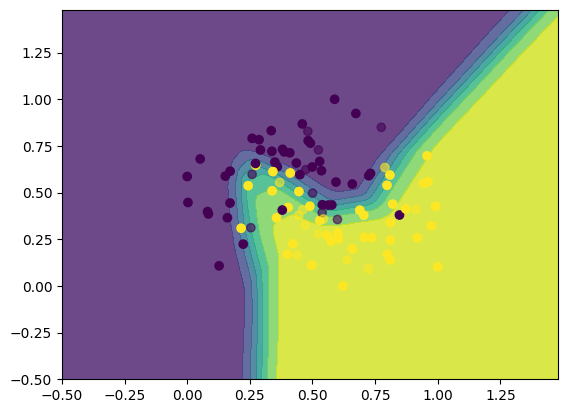

In [16]:
plot_decision_boundary(mlp, (X_train, y_train), (X_test, y_test))

per accedere ai pesi dei vari strati

In [30]:
len(mlp.coefs_)

4

In [32]:
mlp.coefs_[0] #pesi primo strato input e secondo

array([[ 2.10591999e-01,  1.41681706e-01,  1.71358895e-01,
         2.60108356e-01, -1.46008124e-04,  3.17069906e-03,
        -7.20348225e-02,  2.34340290e-01,  2.49407412e-01,
        -5.15388397e-02,  1.79023882e-01, -4.99841961e-02,
         8.54369151e-03,  2.83317434e-01, -7.29058209e-02,
        -1.03279021e-01, -2.28070453e-01,  1.82693767e-01,
         1.73201528e-01,  2.08181990e-01,  3.07872229e-01,
         1.82562905e-01,  1.46898343e-01,  1.15650464e-01,
        -5.65946185e-02,  1.05705150e-01, -2.17540152e-01,
         3.47206199e-01,  5.28150121e-02, -1.05844965e-02,
        -1.62283386e-02,  2.50183251e-02, -2.04965450e-02,
         7.23582990e-05, -9.21573794e-02,  1.89248632e-01,
         2.58412689e-01,  1.89705332e-01,  2.55183366e-01,
         1.01924763e-01, -6.15736702e-03, -3.88304386e-05,
         9.11299889e-02, -7.67947705e-02,  7.45673506e-02,
         1.65980708e-01, -2.34644718e-01, -5.30887454e-02,
        -7.47329432e-03, -6.90515078e-02,  8.59861170e-0

bias dei vari strati

In [33]:
len(mlp.intercepts_)

4

### A cosa serve la funzione di attivazione?

nell'esempio si elimina la funzione di attivazione e si fa una rete molto stratificata con 10 layer e 100 nodi.

In [41]:
#definisco la tupla con ripetendo 100 per 10 volte
hiddel_layer_size = (100,)*10
#come activation si usa la funzione identità
mlp = MLPClassifier(hidden_layer_sizes=hiddel_layer_size, activation="identity", random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)

mlp.score(X_test,y_test)

0.75

In [38]:
weights = 0

for i in range(len(mlp.coefs_)):
  coefs =  mlp.coefs_[i].size #numero id pesi allo strato attuale
  bias = mlp.intercepts_[i].size #numero di bias allo stato attuale
  tot = coefs+bias
  print(f"\tLayer {i} => pesi={coefs} bias={bias} totale={tot}")
  weights+=tot #coefficienti totali della rete bias + pesi

print(f"\nPesi totali della rete={weights}")

	Layer 0 => pesi=200 bias=100 totale=300
	Layer 1 => pesi=10000 bias=100 totale=10100
	Layer 2 => pesi=10000 bias=100 totale=10100
	Layer 3 => pesi=10000 bias=100 totale=10100
	Layer 4 => pesi=10000 bias=100 totale=10100
	Layer 5 => pesi=10000 bias=100 totale=10100
	Layer 6 => pesi=10000 bias=100 totale=10100
	Layer 7 => pesi=10000 bias=100 totale=10100
	Layer 8 => pesi=10000 bias=100 totale=10100
	Layer 9 => pesi=10000 bias=100 totale=10100
	Layer 10 => pesi=100 bias=1 totale=101

Pesi totali della rete=91301


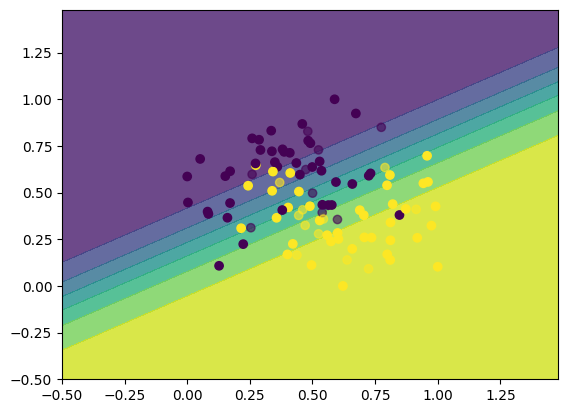

In [39]:
plot_decision_boundary(mlp, (X_train, y_train), (X_test, y_test))